## train with bigger set sizes
Goal here was to test what happens when set size > 8.

In [1]:
from pathlib import Path

import joblib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

import searchnets

In [2]:
results_dir = Path('../../../data/results/')
data_prep_dir = Path('../../../data/data_prepd_for_nets/')

In [3]:
data_gz_paths = sorted(list(data_prep_dir.glob('alexnet*train_big_set_size*gz')))
data_gz_paths = [str(path) for path in data_gz_paths]

results_gz_paths = sorted(list(results_dir.glob('*/*train_big_set_size*gz')))
results_gz_paths = [str(path) for path in results_gz_paths]

In [4]:
test_csv_path='../../../data/csv/alexnet_train_big_set_size_and_sample_size.csv'

In [5]:
stims = ('RVvGV', 'RVvRHGV', '2_v_5')

In [6]:
searchnets.utils.general.results_csv(data_prep_dir,
                                     results_dir,
                                     test_csv_path=test_csv_path,
                                     nets=('alexnet',),
                                     train_types=('train_big_set_size',
                                                  'train_big_set_and_sample_size' ),
                                     stims=stims,
                                     target_condition=('present', 'absent', 'both'),
                                    )

In [6]:
atbss_df = pd.read_csv(test_csv_path)

In [7]:
pal = sns.color_palette('muted')

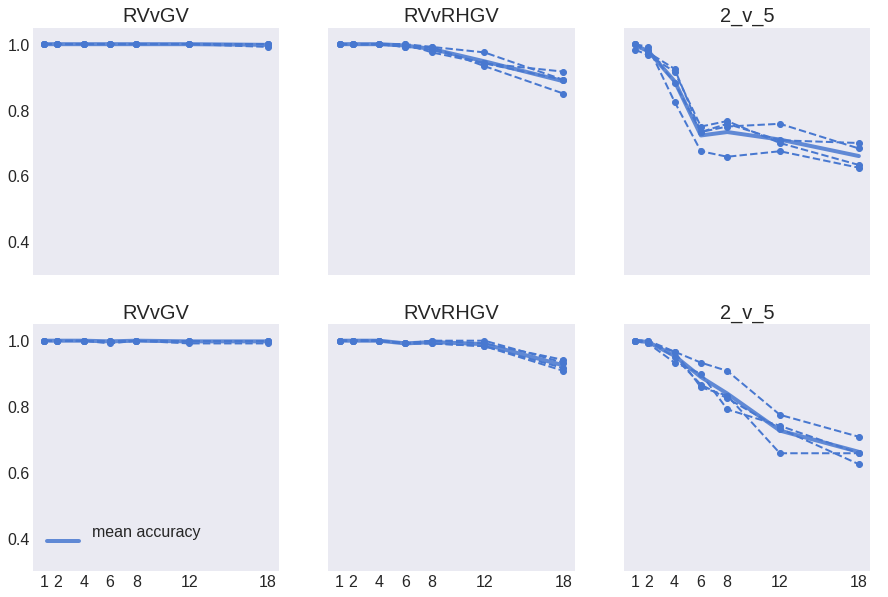

In [14]:
figsize=(15,10)
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for row, train_type in enumerate(['train_big_set_size',
                                  'train_big_set_and_sample_size']): 
    for col, (stim_name, stim_abbrev) in enumerate(zip(
        ['feature', 'conjunction', 'spatial config.'],
        ['RVvGV', 'RVvRHGV', '2_v_5'])):
            if row==1 and col==0:
                add_legend=True
            else:
                add_legend=False

            both_color = pal[0]
            mn_both_color = pal[0]

            searchnets.plot.metric_v_set_size_df(df=atbss_df, 
                                                 net_name='alexnet',
                                                 train_type=train_type, 
                                                 stimulus=stim_abbrev,
                                                 metric='accuracy', 
                                                 conditions=['both'],
                                                 both_color=both_color,
                                                 mn_both_color=mn_both_color,
                                                 set_ylim=True,
                                                 ax=ax[row, col],
                                                 ylim=(0.3, 1.05),
                                                 add_legend=add_legend)
            ax[row, col].set_title(stim_abbrev)

Clearly increasing number of training samples helps rescue the effect.

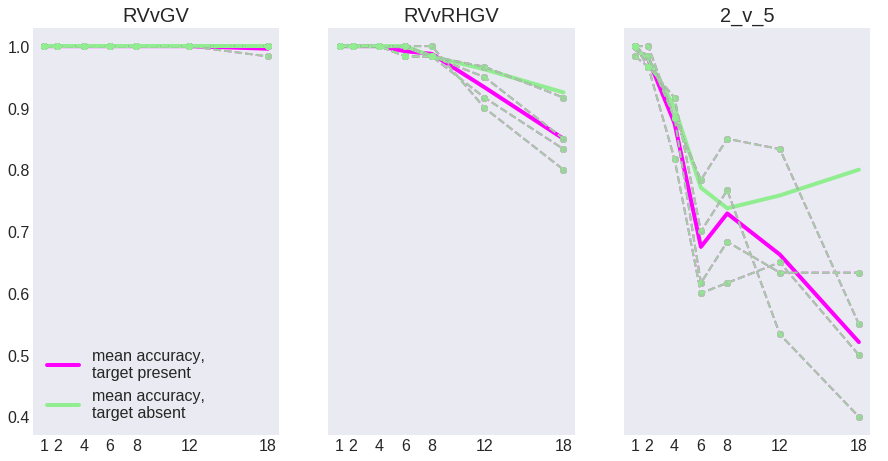

In [13]:
figsize=(15,7.5)
fig, ax = plt.subplots(1, 3, sharex=True, sharey=True, figsize=figsize)
# add a big axis, hide frame
fig.add_subplot(111, frameon=False)
# hide tick and tick label of the big axis
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)

for col, (stim_name, stim_abbrev) in enumerate(zip(
    ['feature', 'conjunction', 'spatial config.'],
    ['RVvGV', 'RVvRHGV', '2_v_5'])):
        if col==0:
            add_legend=True
        else:
            add_legend=False

        searchnets.plot.metric_v_set_size_df(df=atbss_df, 
                                             net_name='alexnet',
                                             train_type='train_big_set_size', 
                                             stimulus=stim_abbrev,
                                             metric='accuracy', 
                                             conditions=['present', 'absent'],
                                             set_ylim=False,
                                             ax=ax[col],
                                             ylim=(0.3, 1.05),
                                             add_legend=add_legend)
        ax[col].set_title(stim_abbrev)